In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge


warnings.filterwarnings('ignore')

## Part A: Data Preprocessing and Baseline [10 points]

#### 1)  Data Loading and Feature Engineering: 

In [2]:
#loading data hour.csv
df = pd.read_csv('hour.csv')

# just checkingdatatypes and data
print("Dataset shape:", df.shape)
print(df.dtypes)
df.head()

Dataset shape: (17379, 17)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


* The bike sharing dataset contains hourly rental data spanning 2 years with 17,379 rows. Each row represents one hourly sample with temporal features and environmental features associated with it.

* we can see that there are some columns like season, year, month... till weathersit in int data type, but they representing their respective categories, we will explore this using the value counts below, and convert these numerical representation of cateogries into encoded columns.

In [3]:
# checking value couunts of each features, as mentioned above.
for col in df.columns:
    unique_vals = df[col].nunique()

    if unique_vals < 25: # 25 becauce to include even time
        print("\n")
        print(df[col].value_counts().sort_index())




season
1    4242
2    4409
3    4496
4    4232
Name: count, dtype: int64


yr
0    8645
1    8734
Name: count, dtype: int64


mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: count, dtype: int64


hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64


holiday
0    16879
1      500
Name: count, dtype: int64


weekday
0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: count, dtype: int64


workingday
0     5514
1    11865
Name: count, dtype: int64


weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


* the above cell shows us that these columns 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit, are indeed categories but in numbers like numerival representation like year has 0-23, and yr has 0--1 and season has 1-4, the issue with this is that the models consider this as order, so to not get into that we encode these using one hot encoding.

#### Drop irrelevant columns 

In [4]:
# DropPING irrelevant columns (causal and regsistered directly gives us the predicted values lol, so we are dropping them off long instant and  Date string, but we already have yr, mnth, hr, weekday extracted
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
df_new = df.drop(columns=columns_to_drop)

In [5]:
# differntiatig target and features
X = df_new.drop('cnt', axis=1)
y = df_new['cnt']


Let’s encode the categorical features we discussed earlier. Since these categories are currently present as numbers, the model might understand them as having an order or magnitude. To make sure that each category is treated equally without any hierarchy, we’ll convert them using one-hot encoding.

In [6]:
print(y.max(), y.min(), y.mean())

977 1 189.46308763450142


#### 1.2 Convert categorical features one hot encoded columns ( we checked values_Counts above)

In [7]:
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)
X_encoded.shape


(17379, 61)

#### Train/Test Split: 

In [8]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Training data", X_train.shape, y_train.shape)
print("Testing data ", X_test.shape, y_test.shape)

Training data (13903, 61) (13903,)
Testing data  (3476, 61) (3476,)


##### 1.3) Baseline Model (Single Regressor): 


##### a) Decision Tree Regressoe

In [9]:
# Decision tree with tree of depth just 6
Dmodel = DecisionTreeRegressor(max_depth=6, random_state=42)
Dmodel.fit(X_train, y_train)

# prediction
y_pred_dt = Dmodel.predict(X_test)

# Calculating RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree RMSE score is {rmse_dt:.2f}")

Decision Tree RMSE score is 118.56


##### b) Linear regression

In [10]:
# fititng base linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictoing the base lr
y_pred_lr = lr_model.predict(X_test)


# Calculating RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression RMSE is {rmse_lr:.2f}")

Linear Regression RMSE is 100.45


In [11]:
# Results comparison between DT and LR.
rmse_table = pd.DataFrame({'Model': ['Decision Tree', 'Linear Regression'], 'RMSE': [rmse_dt, rmse_lr]})
print(rmse_table)


               Model        RMSE
0      Decision Tree  118.558465
1  Linear Regression  100.445946


**Interpretation:**
* RSME score generally represents the error term between the predicted and actuals, linear regression clearly outperforms Decision trees by 18 bikes/hr, but both the scores are pretty high.

* Considering the scores, LR is a bit better than DT, so we use this as baseline model for analysis in later parts. ( In later parts, I  found that the DT tree model has high bias,

**OBESERVATION BACKTRACKING FROM PART B:**
---

So I saw that Decision Tree alone gave very high RMSE. Then I tried Bagging which improved only 5%, which means variance got reduced a little, but the model still had high bias.

But when I used Boosting, the RMSE dropped by 50%,  that means Boosting was able to reduce bias very well. So I feel like DT had bias in this case, even though generally DT is known for high variance. Linear Regression, which is usually high bias and low variance, actually performed better than DT. So in this dataset, DT didn’t help much unless bias was corrected. That’s why Boosting worked, and LR looked better than DT.

## Part B: Ensemble Techniques for Bias and Variance Reduction [20 points] 

#### 1) Bagging (Variance Reduction): 

In [19]:
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=6, random_state=42),n_estimators=100, random_state=42,n_jobs=-1)
bagging_model.fit(X_train, y_train)

# Predicting bagging model with DT estimator
y_pred_bagging = bagging_model.predict(X_test)

# Calculate RMSE
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))

print(f"Single Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Bagging RMSE: {rmse_bagging:.2f}")
print(f"Betterment: {((rmse_dt - rmse_bagging)/rmse_dt)*100:.2f} percent reduction")

Single Decision Tree RMSE: 118.56
Bagging RMSE: 112.01
Betterment: 5.53 percent reduction


**Performance:**
Single Decision Tree RMSE: 118.56
Bagging RMSE: 112.01
Betterment: 5.53 percent reduction

* Bagging is basically using multiple decision trees here, which will reduce variance because we take the average of all the score across the mulitple decision trees. This should indeed reduce the variance.

* But looking at the RSME score, there is not very much reduction in variance from single decision tree. So the variance is not actual problem here, it might be ssuch that, the variance is actually not so high in this modelling because the baseline itself is a shallow tree that doesn't do overfitting, so it must be low variance by design.

* Bagging reduced variance therefore reducing rsme a little, but the other factor is bias which is also a controbuting factor to rsme along with noise, so if variance is not affecting, it must be bias which should have high contributing factor, so let's do boosting, which will reduce bias.

* As the depth of the tree is limited here to 6, we couldn't get the complexities in the data properly, so that is the reason the bias is higher.( Higher depth values reduces rsme score drastically, but the assignment requires to use base model DT only, which is 6 max depth.


In [13]:
# gradientboost regressor
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=6,random_state=42)

gb_model.fit(X_train, y_train)

# Predicting  the test data
y_pred_gb = gb_model.predict(X_test)

# Calculating RMSE
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))


print(f"Gradient Boosting RMSE: {rmse_gb:.2f}")
print(f"vs Single Tree: {rmse_dt:.2f} (Improvement: {rmse_dt - rmse_gb:.2f})")
print(f"vs Bagging: {rmse_bagging:.2f} (Improvement: {rmse_bagging - rmse_gb:.2f})")

Gradient Boosting RMSE: 54.95
vs Single Tree: 118.56 (Improvement: 63.61)
vs Bagging: 112.01 (Improvement: 57.06)


**Performance Comparison:**

(ANALSYSIS BY USING MSE = VARIANCE + BIAS^2))

-Gradient Boosting RMSE: 54.95
* vs Single Tree: 118.56 (Improvement: 63.61)
* vs Bagging: 112.01 (Improvement: 57.06)

 As we discussed in bagging results, variance is not actually the issue here, there must be bias, and the results above shows us that, the bias is actually the problem here as the rsme score drastically reduces from 118 single tree to 54.95 with boosting algo, this is almost 64 percent imporvement from single tree. Boosting is learning in sequential order, correcting the errors made in each step, which is reducing the error in real and predicted values, which is basically reducing the bias in  general.

------------------------------------------------------------------------------------------------------------



## Part C: Stacking for Optimal Performance [10 points] 

Stacking is like we train multiple models that are level-0 learner, and using those predictions we train the final model, which is meta learer, to combine thier predcitins optimally.


**Base learners (Level-0):**
Different algorithms (KNN, Bagging, Gradient Boosting) are trained on the same training data, and each model gives its own prediction for every sample.

**Meta-learner (Level-1):**
We collect the predictions from the base learners and use them as new input features to the ridge regression, so the ridge learns how to combine those outputs to give the final prediction. it basically learns the feature which are basically predictions from the level-0 learneres, therefore assigning weights to the lower for lower ones and higher weights for better predictors. so we will get best output optimally.

In [20]:
#(Level-0)
base_learners = [('knn', KNeighborsRegressor(n_neighbors=5)),
                ('bagging', BaggingRegressor(
                estimator=DecisionTreeRegressor(max_depth=6, random_state=42),n_estimators=100,random_state=42)),
                ('gb', GradientBoostingRegressor(n_estimators=100,
                max_depth=6,random_state=42))]

# (LEVEL-1)
meta_learner = Ridge()

#Stacking Regressor
stacking_model = StackingRegressor(estimators=base_learners,final_estimator=meta_learner)
stacking_model.fit(X_train, y_train)

# Predicting 
y_pred_stacking = stacking_model.predict(X_test)

# rsme score
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))

print(f"Stacking RMSE: {rmse_stacking:.2f}")

Stacking RMSE: 52.42


Exception ignored in: <function ResourceTracker.__del__ at 0x7dfe06d8f060>
Traceback (most recent call last):
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x71e7d2777060>
Traceback (most recent call last):
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child 

## Part D: Final Analysis [10 points] 

In [15]:
# our best baseline was linear regression, so ingorning DT
results = {
    'Model': ['Linear Regression (Baseline)', 'Bagging', 'Boosting', 'Stacking'],
    'RMSE': [rmse_lr, rmse_bagging, rmse_gb, rmse_stacking]}

# dataframe for final analysis
df = pd.DataFrame(results).sort_values('RMSE')
df['change from Baseline (%)'] = ((rmse_lr - df['RMSE']) / rmse_lr * 100).round(2)
df['how much change?'] = (rmse_lr - df['RMSE']).round(2)


print("="*140)
print("FINAL MODEL COMPARISON")
print("="*140)
print(df.to_string(index=False))




FINAL MODEL COMPARISON
                       Model       RMSE  change from Baseline (%)  how much change?
                    Stacking  52.421713                     47.81             48.02
                    Boosting  54.946403                     45.30             45.50
Linear Regression (Baseline) 100.445946                      0.00              0.00
                     Bagging 112.006032                    -11.51            -11.56


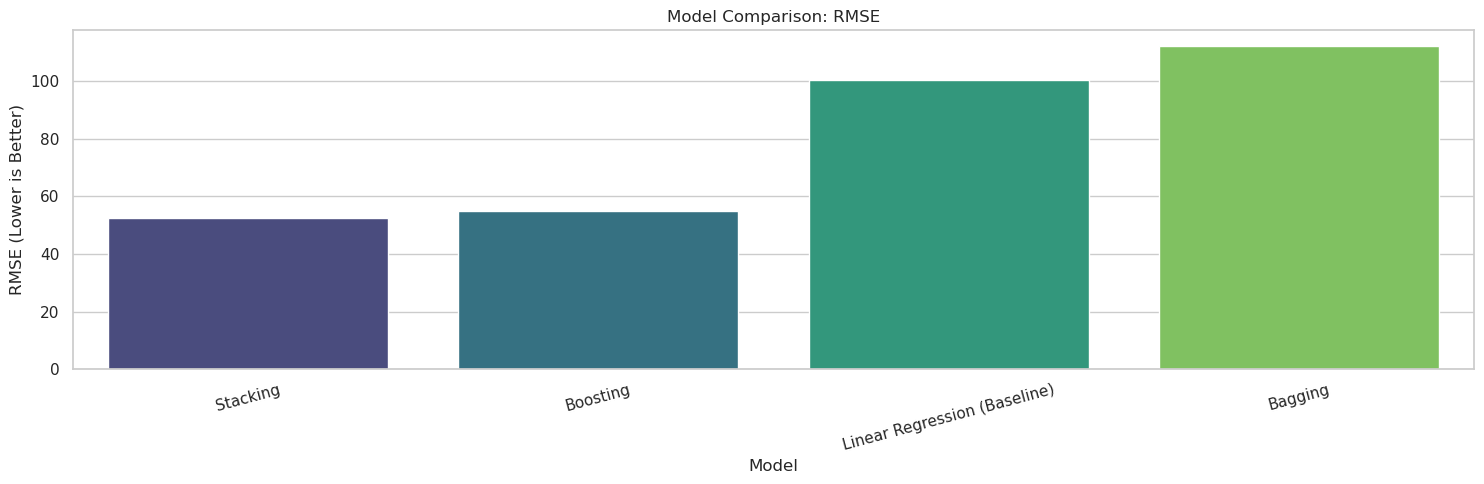

Exception ignored in: <function ResourceTracker.__del__ at 0x7e447d187060>
Traceback (most recent call last):
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7aa40a383060>
Traceback (most recent call last):
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/venka/anaconda3/envs/dsenv/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child 

In [18]:
# please ignore the local environment warning below this!!
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Bar plot for RMSE
sns.barplot(data=df, x='Model', y='RMSE', palette='viridis')
plt.title("Model Comparison: RMSE")
plt.ylabel("RMSE (Lower is Better)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Conclusion

#### Best Performing Model: Stacking Regressor (52.42 RMSE)

**Performance:**
- Stacking RMSE: **52.42**  
- Linear Regression (Baseline): **100.45**  
- Improvement: 48.03 bikes (47.81%)
- Best among all models, even slightly better than Gradient Boosting (54.95)

------------------------------------------------------------------------------

#### Why Stacking Outperformed the Baseline?

From the analysis in Part B, we found that variance was not the main issue, but bias was.  
This was clear because Bagging (which mainly reduces variance), actually performed worse than the baseline, while Boosting (which reduces bias) improved the RMSE by almost 50%. so the main goal for improvement was to handle bias better while keeping variance stable.

Stacking helps here because it combines KNN, Bagging Regressor (DT), and Gradient Boosting (DT), and then usesd Ridge as a meta-learner to give the best weightage to each model’s predictions, and ,and we can rely well on ridge as it is well known for handling overfiting in this case.
Unlike Boosting which builds models one after another, Stacking trains all models in parallel and then combines their outputs in a balanced way.

**Bias and Variance Reduction with diverse models's contribution:** (ANALSYSIS USING MSE = VARIANCE + BIAS^2,  rsme proportional to bias and sqrt(var))
- each model captured different data  structures in the data, the ridge has learnt the right weights, so the knn's local patter, boosting's bias reduction ( our main issue in  this case) and bagging's variance control all contributes effectively.

- Using KNN helped model not to miss local patterns, though the improvement from boosting was very small ( about 2 rsme points), but the less improvement is due to knn not missing local patterns, and the data may not have local patters to learn from.

- Bagging helped us to reduce variance a little, just like in part B therefore improving genrealization a little, and booosting captured most of the complex non linear patters, so combining these three, stacking was able to balance bias and variance, although bias is with the heavy contributio.
